# **BLINKIT ANALYSIS**

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Raw Data

In [2]:
df = pd.read_csv("blinkit-data.csv")

#### Sample Data

In [3]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [4]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


#### Size of the Data

In [7]:
print("Size of the data :",df.shape)

Size of the data : (8523, 12)


#### Field Info

In [8]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### Data Types

In [9]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


#### Data Cleaning

In [13]:
print(df['Item Fat Content'].unique())

<bound method Series.unique of 0       Regular
1       Low Fat
2       Regular
3       Regular
4       Low Fat
         ...   
8518    low fat
8519    low fat
8520    low fat
8521        reg
8522        reg
Name: Item Fat Content, Length: 8523, dtype: object>


In [14]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [15]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### Business Requirements

#### KPI Requirements

In [19]:
# Total Sales
total_sales = df['Sales'].sum()
# Average Sales
average_sales = df['Sales'].mean()
# No of Items Sold
no_of_items_sold = df['Sales'].count()
# Average Ratings
average_ratings = df['Rating'].mean()
#Display
print(f"Total Sales: {total_sales :,.0f}")
print(f"Average Sales: {average_sales :,.0f}")
print(f"No of Items Sold: {no_of_items_sold :,.0f}")
print(f"Average Ratings: {average_ratings :,.0f}")

Total Sales: 1,201,681
Average Sales: 141
No of Items Sold: 8,523
Average Ratings: 4


### CHARTS Requirements

#### Total Sales by FAT Content

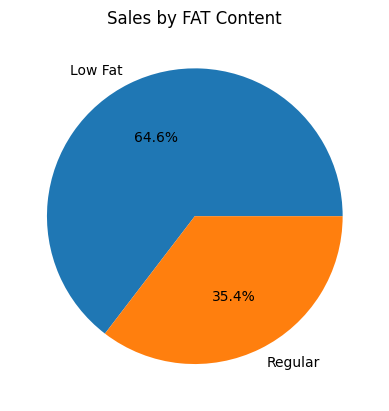

In [21]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%1.1f%%')
plt.title('Sales by FAT Content')
plt.show()

#### Total Sales by Item Type

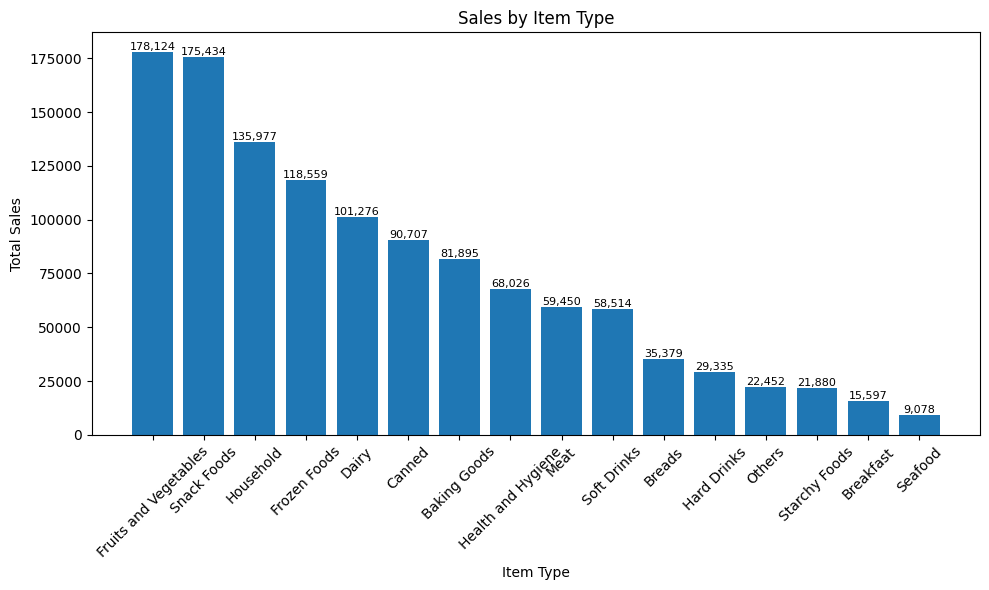

In [25]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation=45)
plt.title('Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize = 8)


plt.tight_layout()
plt.show()

#### Fat Content by Outlet for Total Sales

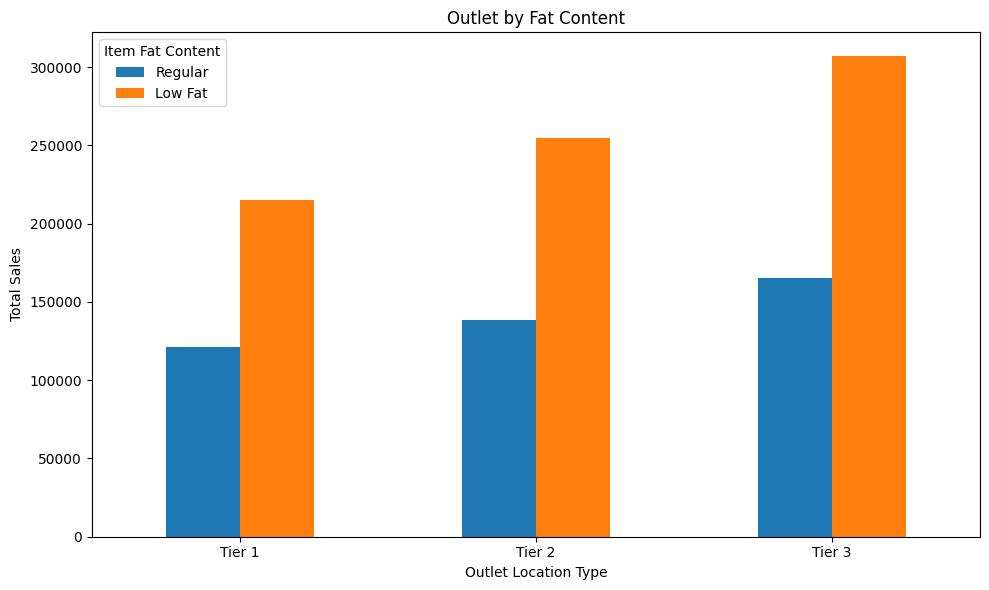

In [27]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind='bar', figsize=(10, 6), title = "Outlet by Fat Content")
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Total Sales by Outet Establishment

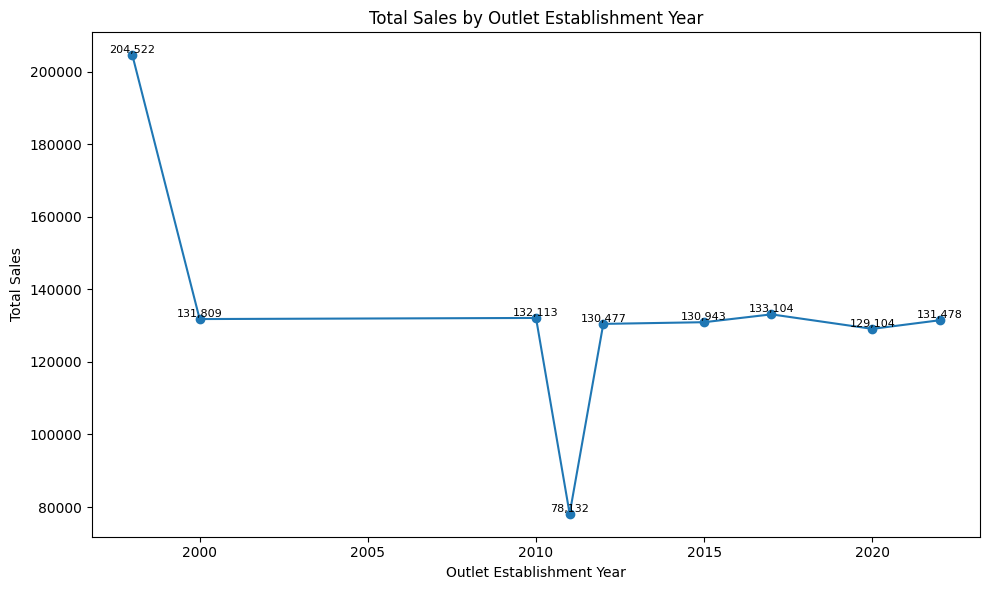

In [28]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')

for x,y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom',fontsize = 8)

plt.tight_layout()

plt.show()

#### Sales by Outlet Size

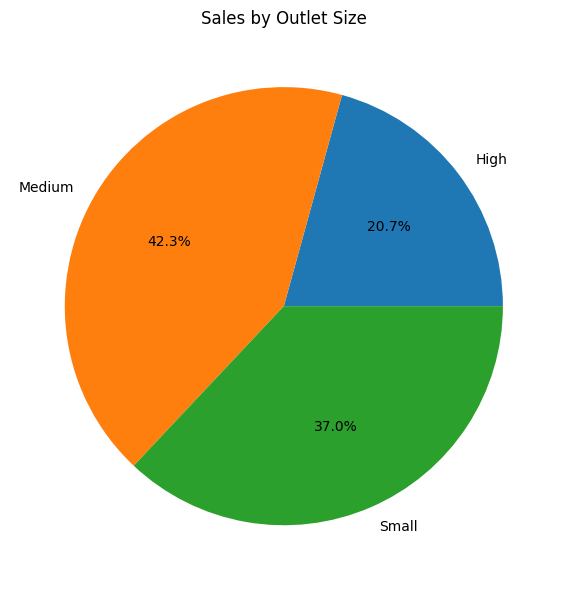

In [29]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(10, 6))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%')
plt.title('Sales by Outlet Size')
plt.tight_layout()
plt.show()

#### Sales by Outlet Location

/tmp/ipython-input-2873901796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location, palette='viridis')


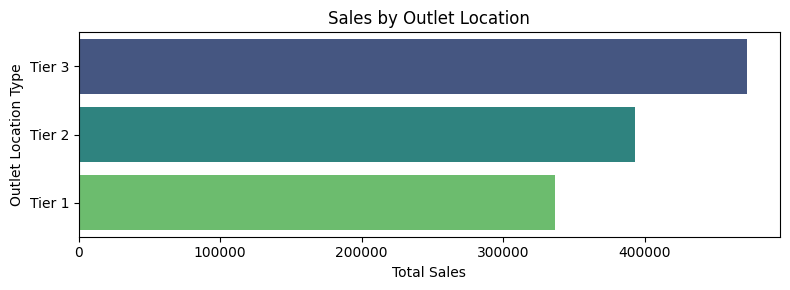

In [31]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location, palette='viridis')
plt.title('Sales by Outlet Location')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout()
plt.show()